In [1]:
import numpy as np
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import jieba
import wordcloud
from PIL import Image
%matplotlib inline

In [2]:
# 连接数据库并读取数据
connection = pymysql.connect(host='localhost', user='kilo', passwd='839211046', db='practice_database')
sql = """select * from movie_comments"""
data = pd.read_sql(sql, connection)

In [3]:
data.head()

,movie_name,user_name,watched,rating,rating_time,comment,votes,user_url
0,复仇者联盟,：-）,看过,力荐,2019-04-24 19:02:33,妇联在中国死的最晚，复活的最快！ps：今天刚顶着被辞退的风险看完妇联4值了！💯！期待下一个10年！,31,https://www.douban.com/people/151725552/
1,复仇者联盟,.M,看过,还行,2019-04-24 17:35:16,英雄集结那一段还是有小小感动和热血，和前几部一样，整个故事基本没有让人惊喜的地方，套路化的剧...,7,https://www.douban.com/people/grayfish/
2,复仇者联盟,。,看过,力荐,2019-04-24 00:00:03,献给我人生中最美好的十一年。谢谢你，漫威，谢谢你让我的青春有了一个最完美的结局,8181,https://www.douban.com/people/186208874/
3,惊奇队长,"""eMily""┆rehab",看过,推荐,2019-03-09 22:44:25,Marvel扣题大作！最逆天人设英雄登场！坐等单挑响指灭霸👏这是个其貌不扬胸部平平屁股扁扁的...,0,https://www.douban.com/people/emilycou/
4,复仇者联盟,{莫热},看过,力荐,2019-04-25 08:49:58,MCU22。对于所有在满座剧场观影的观众来说，都是难得的巅峰体验，看着角色们死死生生，从穿越...,1,https://www.douban.com/people/xztiya/


In [4]:
avengers_comments = data[data['movie_name'] == '复仇者联盟']
captain_comments = data[data['movie_name'] == '惊奇队长']

In [5]:
content1 = "\n".join(avengers_comments['comment'])
jieba.load_userdict(r'C:\Users\KILO\DataAnalysis\douban_movie_comments_analysis\哈工大停用词表.txt')
stopwords = [line.strip() for line in open(r'C:\Users\KILO\DataAnalysis\douban_movie_comments_analysis\哈工大停用词表.txt', encoding='utf-8').readlines()]
jieba.add_word('钢铁侠')
jieba.add_word('漫威电影')
words = jieba.cut(content1, cut_all=False)
counts = {}
for word in words:
    if word not in stopwords:
        if len(word) == 1:
            continue
        else:
            counts[word] = counts.get(word, 0) +1

avengers_frequency = pd.Series(counts).sort_values(ascending=False)
avengers_frequency

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\KILO\AppData\Local\Temp\jieba.cache
Loading model cost 0.954 seconds.
Prefix dict has been built succesfully.


电影      164
漫威      140
英雄      107
十年       90
没有       81
最后       79
真的       74
钢铁侠      65
复联       62
情怀       60
一部       58
角色       57
美队       56
小时       55
粉丝       53
超级       53
时间       51
剧情       51
所有       51
结局       47
宇宙       47
不是       42
复仇者      42
过去       41
观众       40
结束       38
故事       37
队长       36
穿越       35
罗素       35
       ... 
不多        1
一哥        1
女拳        1
完蛋        1
全力以赴      1
一面        1
不留        1
欣赏        1
4CP       1
女孩        1
英雄版       1
无须        1
坚守        1
号角        1
荒芜        1
簌簌        1
落下        1
大雨滂沱      1
罪恶        1
城市        1
握住        1
废墟        1
继续        1
守候        1
沧海桑田      1
爱慕        1
容颜        1
新兴        1
怀抱        1
提高        1
Length: 5142, dtype: int64

In [6]:
plt.style.use('ggplot') # 绘制seaborn风格的图表
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

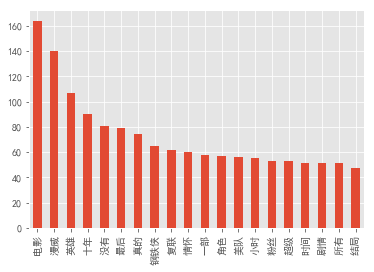

In [7]:
avengers_frequency[:20].plot(kind='bar')

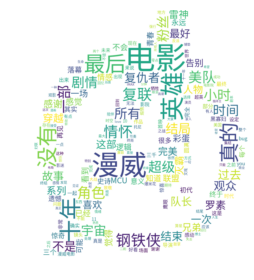

In [8]:
avengers_mask = np.array(Image.open("avengers.png"))
wc = wordcloud.WordCloud(
    # 设置词云图片背景色，默认黑色
    background_color='white',
    # 设置词云最大单词数
    max_words=200,
    random_state=42,
    # 设置词云中字号最大值
    # max_font_size=80,
    # 设置词云图片宽、高
    # 设置词云文字字体(美化和解决中文乱码问题)
    mask=avengers_mask,
    font_path=r'C:\Users\KILO\AppData\Local\Microsoft\Windows\Fonts\SourceHanSansSC-Regular.otf'
)

wc.generate_from_frequencies(avengers_frequency)
image_colors = wordcloud.ImageColorGenerator(avengers_mask)
# 绘图(标准长方形图)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()
plt.show()
wc.to_file('Avengers_cloud.png')

In [9]:
content2 = "\n".join(captain_comments['comment'])
jieba.load_userdict(r'C:\Users\KILO\DataAnalysis\douban_movie_comments_analysis\哈工大停用词表.txt')
stopwords = [line.strip() for line in open(r'C:\Users\KILO\DataAnalysis\douban_movie_comments_analysis\哈工大停用词表.txt', encoding='utf-8').readlines()]
jieba.add_word('惊奇队长')
jieba.add_word('漫威电影')
words = jieba.cut(content2, cut_all=False)
counts = {}
for word in words:
    if word not in stopwords:
        if len(word) == 1:
            continue
        else:
            counts[word] = counts.get(word, 0) +1

captain_frequency = pd.Series(counts).sort_values(ascending=False)
captain_frequency

漫威      144
惊奇队长    125
电影      117
英雄       87
没有       87
女性       66
复联       64
剧情       64
角色       63
彩蛋       55
宇宙       54
真的       54
超级       48
有点       48
不是       47
故事       45
女主       43
最后       43
感觉       42
喜欢       39
一部       38
局长       38
好看       37
女权       34
人物       32
女侠       31
片头       31
可爱       31
这种       30
队长       30
       ... 
对付        1
早点        1
冥王篇       1
圣斗士       1
空手        1
全弄炸       1
全打飞       1
yes       1
女主说       1
多提        1
坑人        1
具备        1
前导        1
修正主义      1
巨大胜利      1
算作        1
天生        1
七龙珠       1
彰显        1
兴致        1
会真香       1
不堪一击      1
脆弱        1
预先        1
津津有味      1
毛病        1
好美        1
等一等       1
死掉        1
疯狂        1
Length: 4875, dtype: int64

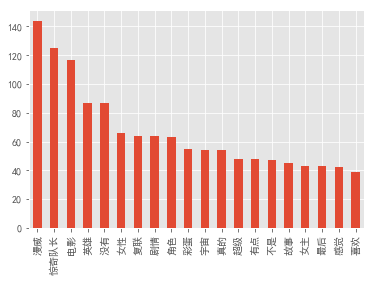

In [10]:
captain_frequency[:20].plot(kind='bar')

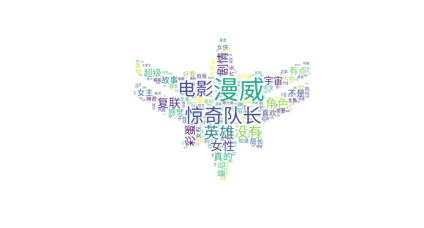

In [11]:
avengers_mask = np.array(Image.open("captain_marvel.png"))
wc = wordcloud.WordCloud(
    # 设置词云图片背景色，默认黑色
    background_color='white',
    # 设置词云最大单词数
    max_words=200,
    random_state=42,
    # 设置词云中字号最大值
    # max_font_size=80,
    # 设置词云图片宽、高
    # 设置词云文字字体(美化和解决中文乱码问题)
    mask=avengers_mask,
    font_path=r'C:\Users\KILO\AppData\Local\Microsoft\Windows\Fonts\SourceHanSansSC-Regular.otf'
)
wc.generate_from_frequencies(captain_frequency)
image_colors = wordcloud.ImageColorGenerator(avengers_mask)
# 绘图(标准长方形图)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()
plt.show()
wc.to_file('captain_cloud.png')